In [401]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') # Undesired warning messages was blocked

# Exploratory Data Analysis

In [402]:
df = pd.read_csv('huge_1M_titanic.csv')

In [403]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1.000000e+06,1000000.000000,1000000.00000,801400.000000,1000000.000000,1000000.000000,1000000.000000
mean,5.013095e+05,0.381681,2.31125,29.280339,0.511101,0.360037,33.461097
std,2.886753e+05,0.485799,0.83577,12.744978,1.104846,0.767296,47.976641
min,1.310000e+03,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000
25%,2.513098e+05,0.000000,2.00000,21.000000,0.000000,0.000000,8.568924
50%,5.013095e+05,0.000000,3.00000,29.000000,0.000000,0.000000,15.883647
75%,7.513092e+05,1.000000,3.00000,37.000000,1.000000,0.000000,35.561000
max,1.001309e+06,1.000000,3.00000,114.000000,8.000000,6.000000,640.883614


In [404]:
df.shape

(1000000, 12)

In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   PassengerId  1000000 non-null  int64  
 1   Survived     1000000 non-null  int64  
 2   Pclass       1000000 non-null  int64  
 3   Name         1000000 non-null  object 
 4   Sex          1000000 non-null  object 
 5   Age          801400 non-null   float64
 6   SibSp        1000000 non-null  int64  
 7   Parch        1000000 non-null  int64  
 8   Ticket       1000000 non-null  object 
 9   Fare         1000000 non-null  float64
 10  Cabin        229805 non-null   object 
 11  Embarked     997760 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 91.6+ MB


In [406]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,198600
SibSp,0
Parch,0
Ticket,0
Fare,0


In [407]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1310,1,1,"Name1310, Miss. Surname1310",female,NaN,0,0,SOTON/O2 3101272,76.760165,NaN,C
1,1311,0,3,"Name1311, Col. Surname1311",male,29.0,0,0,223596,10.193097,NaN,S
2,1312,0,3,"Name1312, Mr. Surname1312",male,20.0,0,0,54636,12.029416,C83,C


When we examine on data, there are null datas which need to evaluate.

Also there are some columns need to be removed because of the fact that they do not have any affect on model's performance.

Machine learning algorithms require numerical data for computations. Thus categorical datas need to be converted to numerical

# Removing Unnecessary Columns

These columns below do not affect model's performance

In [408]:
df = df.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Evaluating Missing Values

In [409]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,198600
SibSp,0
Parch,0
Fare,0
Embarked,2240


There are null values in age and embarked columns. Age is numerical and embarked is a categorical column. Age must be filled with mean or median and embarked must be filled with mode value.

In [410]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [411]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Data Visulation

Before Data preprocessing I wanna draw some graphs

In [412]:
plt.style.use('ggplot')

- Sex

([<matplotlib.patches.Wedge at 0x7c1968152230>,
 [Text(-0.4958145197954591, 0.9819205476819387, 'Male'),
  Text(0.495814519795459, -0.9819205476819388, 'Female')],
 [Text(-0.2704442835247958, 0.5355930260083301, '64.88%'),
  Text(0.27044428352479577, -0.5355930260083301, '35.12%')])

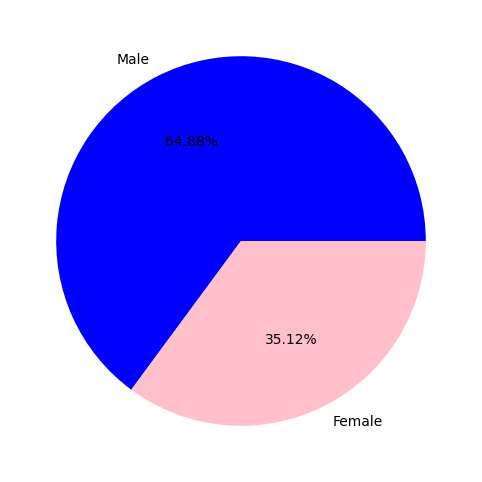

In [413]:
male = df['Sex'].value_counts()['male']
female = df['Sex'].value_counts()['female']

labels = ['Male', 'Female']
values = [male, female]
colors = ['blue', 'pink']

plt.figure(figsize = (10, 6))
plt.pie(values, labels = labels, colors = colors, autopct = '%1.2f%%')

Men passengers are more crowded than women

- Age

<Axes: xlabel='Sex', ylabel='Age'>

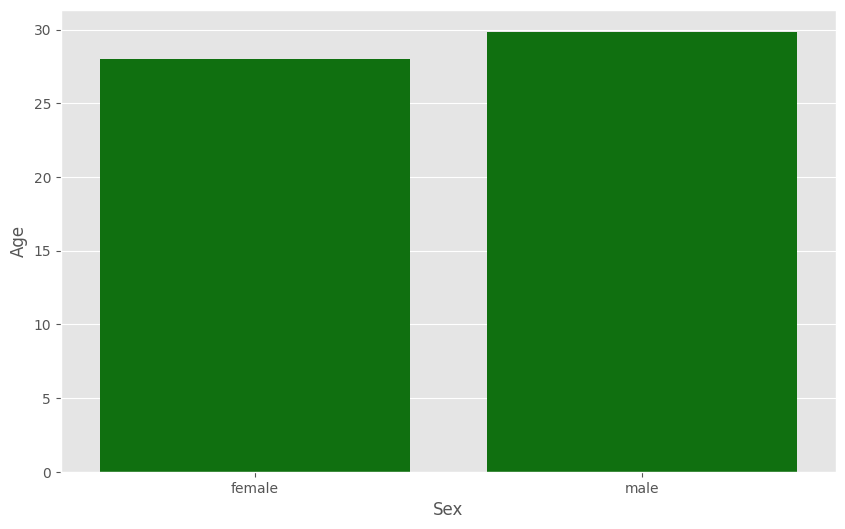

In [414]:
age_and_gender = df.groupby('Sex')['Age'].mean().reset_index()

plt.figure(figsize = (10, 6))
sns.barplot(x = age_and_gender['Sex'], y = age_and_gender['Age'], color = 'green')

Average age of men is older than women's

- Survived & Gender

([<matplotlib.patches.Wedge at 0x7c1977c55030>,
 [Text(-0.6002768080191255, 0.9217742422927482, 'female'),
  Text(0.6002768943218557, -0.9217741860907733, 'male')],
 [Text(-0.32742371346497756, 0.502785950341499, '68.37%'),
  Text(0.32742376053919403, -0.5027859196858763, '31.63%')])

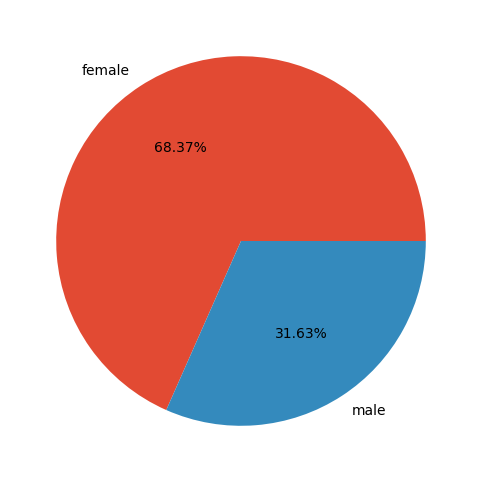

In [415]:
survived_and_gender = df.groupby('Sex')['Survived'].sum().reset_index()

labels = survived_and_gender['Sex']
values = survived_and_gender['Survived']

plt.figure(figsize = (10, 6))
plt.pie(values, labels = labels, autopct = '%1.2f%%')

Most of survived passengers are women

Passenger Class & Ticket Fare

<Axes: xlabel='Pclass', ylabel='Fare'>

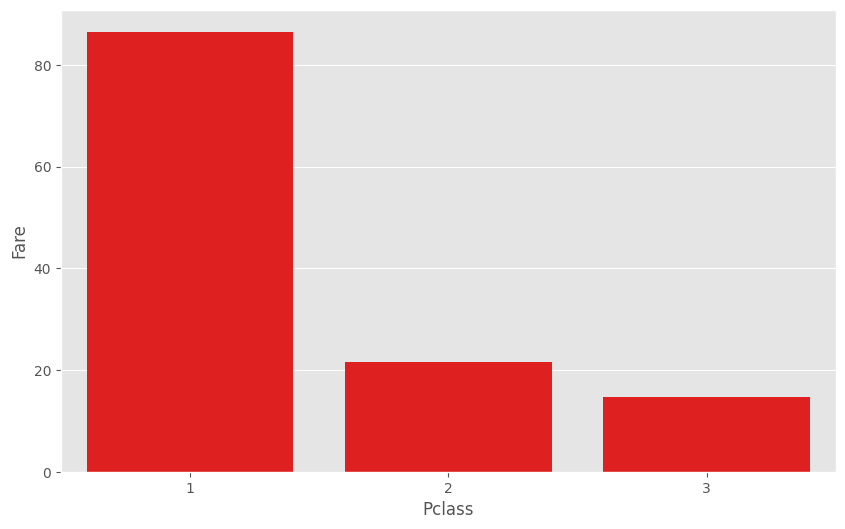

In [416]:
pclass_and_fare = df.groupby('Pclass')['Fare'].mean().reset_index()

plt.figure(figsize = (10, 6))
sns.barplot(y = pclass_and_fare['Fare'], x = pclass_and_fare['Pclass'], color = 'red')

As expected first class is more expensive

In [417]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,female,29.0,0,0,76.760165,C
1,0,3,male,29.0,0,0,10.193097,S
2,0,3,male,20.0,0,0,12.029416,C


Embarked & Fare

Embarkeds:

C -> Cherbourg

Q -> Queenstown

S -> Southampton


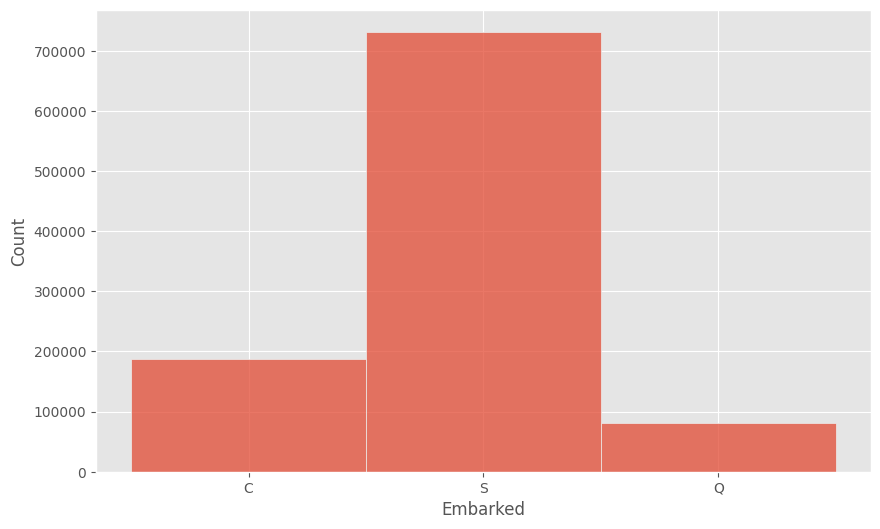

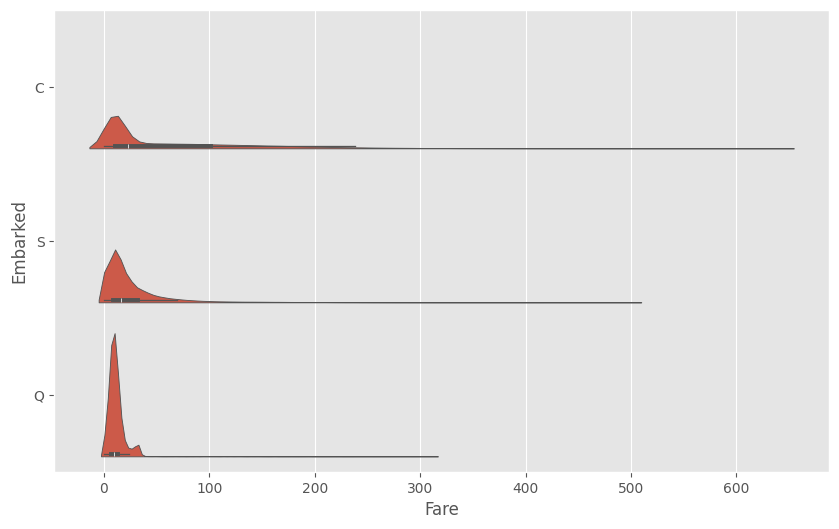

In [418]:
plt.figure(figsize = (10, 6))
sns.histplot(df['Embarked'])
plt.show()

plt.figure(figsize = (10, 6))
sns.violinplot(data = df, y = 'Embarked', x = 'Fare', split = True)
plt.show()

1) Most of passengers get on the Titanic from Soutampthon passport

2) Differences between Embarked's fare may causes of distance and passenger class. But we can predict the distances due to second graph.


Another way to predict distance to final embarked is looking at the hills at the begin of graph. It is higher in Queenstown embarked and it is the lowest in Cherbourg. This fact says most of passengers from Queenstown bought ticket cheaper. Class factor seems in outliers(lines in graph) so it supports the distance prediction

Probably distances to final embarked: Cherbourg > Soutampthon > Queenstown

# Data Preprocessing

As I highlighted above, machine learning algorithms requires numerical data. We can use Label Encoding or One Hot Encoding for this processing

In [419]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,female,29.0,0,0,76.760165,C
1,0,3,male,29.0,0,0,10.193097,S
2,0,3,male,20.0,0,0,12.029416,C


In [420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Survived  1000000 non-null  int64  
 1   Pclass    1000000 non-null  int64  
 2   Sex       1000000 non-null  object 
 3   Age       1000000 non-null  float64
 4   SibSp     1000000 non-null  int64  
 5   Parch     1000000 non-null  int64  
 6   Fare      1000000 non-null  float64
 7   Embarked  1000000 non-null  object 
dtypes: float64(2), int64(4), object(2)
memory usage: 61.0+ MB


object data types need to be converted

There are 2 unique value in Sex column and 3 unique values in Embarked column. And there is not any hierarchy between these values. Consequently get_dummy method can be used here because of simplicity of data

In [421]:
#df = df.drop('Embarked', axis = 1)

In [422]:
df = pd.get_dummies(df, columns = ['Sex', 'Embarked'], drop_first = True)

In [423]:
df.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,1,29.0,0,0,76.760165,False,False,False
1,0,3,29.0,0,0,10.193097,True,False,True
2,0,3,20.0,0,0,12.029416,True,False,False


# Normalization

After converting all columns to numeric, we should normalize it in order to prevent model to confuse

In [424]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
target_column = 'Survived'
df_features = df.drop(columns = [target_column])
df_target = df[target_column]

df_features_scaled = scaler.fit_transform(df_features)
df_features_scaled = pd.DataFrame(df_features_scaled, columns = df_features.columns)
df_scaled = pd.concat([df_features_scaled, df_target.reset_index(drop = True)], axis = 1)
df_scaled.columns = list(df_features.columns) + [target_column]

In [425]:
df_scaled.head(3)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
0,-1.568913,-0.019690,-0.4626,-0.469229,0.902504,-1.359303,-0.297771,-1.651449,1
1,0.824090,-0.019690,-0.4626,-0.469229,-0.484986,0.735671,-0.297771,0.605529,0
2,0.824090,-0.808474,-0.4626,-0.469229,-0.446711,0.735671,-0.297771,-1.651449,0


# Model Selection

We are gonna predict if a passenger survives or not. Thus this is a classification problem. Let's include required libraries

In [426]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, make_scorer, f1_score

we have 1 million rows so cross validation may take hours. Splitting Data manually before train test split may be faster

We are gonna predict survived situation so our target variable(y) is survived and all columns except it is x.

In [436]:
df_cross = df_scaled[:100000]
x = df_cross.drop('Survived', axis = 1)
y = df_cross['Survived']

Now we can split the data

In [437]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 42)

XGB Classifier seem a better model when you compare all scores in classification report

In [438]:
f1_scorer = make_scorer(f1_score, average='weighted')

In [439]:
models = [LogisticRegression(), RandomForestClassifier(), XGBClassifier()]
for model in models:
  score = cross_val_score(model, x, y, cv = 5, scoring = f1_scorer)
  print(f'Score of {model} = {score}')

Score of LogisticRegression() = [0.79850612 0.80474161 0.80235822 0.80044804 0.80230412]
Score of RandomForestClassifier() = [0.84970059 0.85126165 0.85134634 0.85126054 0.84766154]
Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) = [0.86864238 0.87591598 0.87699463 0.87049338 0.87

XGB Classifier is better model

In [431]:
model = XGBClassifier()

param_distributions = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.5, 0.7, 0.8],
    'colsample_bytree': [0.5, 0.7, 0.8],
    'gamma': [0, 1, 5]
}

random_search = RandomizedSearchCV(estimator = model, param_distributions=param_distributions, n_iter=25, scoring = f1_scorer, cv=5, n_jobs=-1, random_state=42)
random_search.fit(x_train, y_train)

print(f'Best Parameter: {random_search.best_params_}')
print(f'Best Scores: {random_search.best_score_}')

Best Parameter: {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.7}
Best Scores: 0.8531325768774911


In [435]:
xg = XGBClassifier(subsample = 0.8, n_estimators = 100, min_child_weight = 1, max_depth = 6, learning_rate = 0.2, gamma = 0, colsample_bytree = 0.7)
xg.fit(x_train, y_train)
xg_pred = xg.predict(x_test)
print(classification_report(y_test, xg_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1246
           1       0.84      0.77      0.80       754

    accuracy                           0.85      2000
   macro avg       0.85      0.84      0.84      2000
weighted avg       0.85      0.85      0.85      2000



After determining the best parameters, we got a f1-score around 85% which is not bad.